## Load the Dataset


In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, Input, Conv1D, GlobalMaxPooling1D
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from google drive
train_df = pd.read_csv('/content/drive/MyDrive/TensorflowDatasets/jigsaw-toxic-comment-classification-challenge/train.csv')
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Identity Hate Counts')

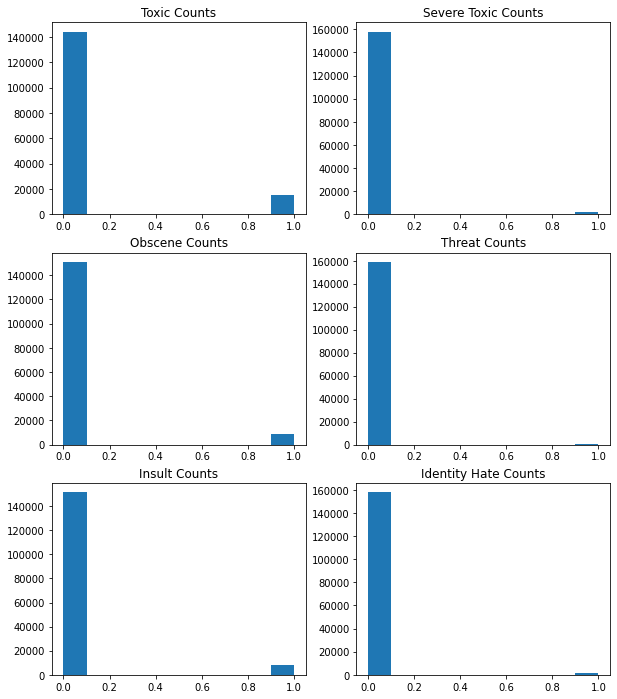

In [ ]:
# Display the count diagrams
plt.figure(figsize=(10,12))
plt.subplot(3,2,1)
plt.hist(train_df['toxic'])
plt.title('Toxic Counts')
plt.subplot(3,2,2)
plt.hist(train_df['severe_toxic'])
plt.title('Severe Toxic Counts')
plt.subplot(3,2,3)
plt.hist(train_df['obscene'])
plt.title('Obscene Counts')
plt.subplot(3,2,4)
plt.hist(train_df['threat'])
plt.title('Threat Counts')
plt.subplot(3,2,5)
plt.hist(train_df['insult'])
plt.title('Insult Counts')
plt.subplot(3,2,6)
plt.hist(train_df['identity_hate'])
plt.title('Identity Hate Counts')

In [ ]:
# Shuffle the dataset before split it into train and validation datasets
train_df = train_df.sample(frac=1)
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
26543,46548b1b652555dc,"""\n\n""""Unthinking automated 'corrections'""""\nY...",0,0,0,0,0,0
67585,b4de65bc96a5b7c7,"you wouldn't understand this community, and ho...",0,0,0,0,0,0
125657,a031e82961118141,"And Joe Camel, where is he?? *hic*",0,0,0,0,0,0
104703,3020fa94bc195c86,"Yes, well, the English name has no official st...",0,0,0,0,0,0
109986,4c5dbb88e30eaec0,"""he talks about it at 4:20, """"new wayne specia...",0,0,0,0,0,0


## Split the dataset into train and validation sets

In [ ]:
# Define sentences and label
from sklearn.model_selection import train_test_split
sentences = train_df['comment_text'].to_list()
labels = train_df.drop(columns=['id', 'comment_text']).to_numpy()
sentences[:10], labels[:10, :]

(['"\n\n""Unthinking automated \'corrections\'""\nYour edit summary  at the article Grotrian-Steinweg characterised the bulk of my edits as ""unthinking automated \'corrections\'"" and you reverted them. In general, I find the principles of ""Wikipedia:Revert only when necessary"" worthy of consideration. In particular, I assure you they were not automated and are the result of some thinking. In detail:\nthe correct syntax for a reference invocation by name is, as for any unary HTML tag, to close it with a space preceding the slash: \nthe wikilink for Germany in the infobox is a case of WP:OVERLINK\nwhen using , the parameter  is unnecessary.\nthe term ""Initial Interest Confusion"" is capitalised at its article and I presume with good reason\nthe template  is useful even for articles which currently already show all of that caterory\'s images as more files might be placed into that category in the future\nI suggest you revert your edit; additionally, please consider WP:Revert only whe

In [ ]:
# Split the dataset into train and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(sentences, labels, test_size=0.20, shuffle=False)
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(127656, 127656, 31915, 31915)

## Preprocess the data

In [ ]:
# Text vectorization
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
max_tokens = 10000
max_len = 20
vectorizer = TextVectorization(max_tokens=max_tokens, 
                               output_sequence_length=max_len,
                               pad_to_max_tokens=True)

In [ ]:
# Fit the train sentences into the vectorizer
vectorizer.adapt(train_sentences)

In [ ]:
# Check the top 5 most occurred words in the text
vectorizer.get_vocabulary()[2:7]

['the', 'to', 'of', 'and', 'a']

In [ ]:
# Display some vectorized sentences
for i in range(5):
  random_sentence = train_sentences[random.randint(0, len(train_sentences))]
  vectorized_sentence = vectorizer(random_sentence)
  print(f'Original Text:{random_sentence}\n')
  print(f'Vectorized Text:{vectorized_sentence}\n')
  print('-'*100)

Original Text:Newgrounds 

I like and totally support your work on NG.

Vectorized Text:[  1   8  51   5 953 342  21 141  16   1   0   0   0   0   0   0   0   0
   0   0]

----------------------------------------------------------------------------------------------------
Original Text:Why do you assume that I'm a native speaker of English? Why don't you simply accept that I'm having messages relayed from an alien planet on which, despite multifarious differences, something akin to the Roman alphabet developed in parallel, complete with 'e,' 'o,' and the 'ee'/'oo' innovation in the more advanced cultures? Why do you insist on putting something called 'regularity' (= 'one grapheme one function'?) above efficiency in conveying the full range and variety of phonemes? Stereotypically German or what?

Vectorized Text:[  75   33    7  792   10   70    6 1741 3446    4  278   75   56    7
  282  785   10   70  330  875]

------------------------------------------------------------------------

In [ ]:
# Create an embedding layer
from tensorflow.keras.layers import Embedding
embedding = Embedding(input_dim=max_tokens,
                      output_dim=128,
                      input_length=max_len)

In [ ]:
# Try embedding layer
for i in range(5):
  random_sentence = train_sentences[random.randint(0,len(train_sentences))]
  vectorized_sentence = vectorizer(random_sentence)
  embedded = embedding(vectorized_sentence)
  print(f'Original: {random_sentence}\n')
  print(f'Vectorized: {vectorized_sentence}\n')
  print(f'Embedded: {embedded}\n')
  print('-'*100)

Original: 6D vs 7D 

regarding my 6D vs 7D 'undo', see my response on the talk page of that Canon table.  Don't bother with my talk page, it constantly changes because I get a different IP address every time I connect 108.96.100.101

Vectorized: [   1 1309    1  408   29    1 1309    1 2013   66   29  562   16    2
   45   28    4   10 6296  903]

Embedded: [[ 0.01027796  0.04680634  0.03547832 ...  0.0347609   0.02043002
   0.01567302]
 [ 0.00101755  0.02974803 -0.0093915  ... -0.04945507  0.02777158
  -0.04010721]
 [ 0.01027796  0.04680634  0.03547832 ...  0.0347609   0.02043002
   0.01567302]
 ...
 [ 0.03624694 -0.01519152 -0.03052312 ... -0.00940464 -0.04936575
   0.04584637]
 [-0.02891703 -0.02678602  0.01754108 ... -0.04605309 -0.03420024
   0.01968827]
 [ 0.04118612 -0.03156214  0.03395904 ... -0.04465967 -0.03547175
  -0.02996892]]

----------------------------------------------------------------------------------------------------
Original: AfD nomination of Timeline of cold f

## Create the dataset

In [ ]:
# Create train and validation datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels)).batch(256)
val_ds = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels)).batch(256)

## LSTM Model

In [ ]:
# Create an LSTM model
inputs = Input(shape=(1,), dtype=tf.string, name='input_layer')
vec = vectorizer(inputs)
emb = embedding(vec)
lstm = Bidirectional(LSTM(16, return_sequences=True))(emb)
lstm = Bidirectional(LSTM(16))(lstm)
outputs = Dense(6, activation='sigmoid')(lstm)
lstm_model = tf.keras.Model(inputs, outputs)

# Compile the model
lstm_model.compile(loss='binary_crossentropy',
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                   metrics=['categorical_accuracy'])

# Display the model summary
lstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 20)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 20, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 20, 32)           18560     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                             

In [ ]:
# Fit the model
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
lstm_history = lstm_model.fit(train_ds,
                              steps_per_epoch=len(train_ds),
                              epochs=50,
                              validation_data=val_ds,
                              validation_steps=len(val_ds),
                              callbacks=[early_stopping])

Epoch 1/50
499/499 [==============================] - 36s 50ms/step - loss: 0.3193 - categorical_accuracy: 0.7642 - val_loss: 0.1562 - val_categorical_accuracy: 0.9919
Epoch 2/50
499/499 [==============================] - 19s 38ms/step - loss: 0.1221 - categorical_accuracy: 0.9533 - val_loss: 0.0953 - val_categorical_accuracy: 0.9442
Epoch 3/50
499/499 [==============================] - 19s 38ms/step - loss: 0.0808 - categorical_accuracy: 0.9750 - val_loss: 0.0760 - val_categorical_accuracy: 0.9733
Epoch 4/50
499/499 [==============================] - 19s 38ms/step - loss: 0.0682 - categorical_accuracy: 0.9829 - val_loss: 0.0705 - val_categorical_accuracy: 0.9745
Epoch 5/50
499/499 [==============================] - 19s 38ms/step - loss: 0.0627 - categorical_accuracy: 0.9871 - val_loss: 0.0682 - val_categorical_accuracy: 0.9806
Epoch 6/50
499/499 [==============================] - 19s 38ms/step - loss: 0.0593 - categorical_accuracy: 0.9899 - val_loss: 0.0674 - val_categorical_accuracy:

In [ ]:
# Create the plotting function
def plot_loss(history):
  # Define the losses and accuracies
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))

  acc = history.history['categorical_accuracy']
  val_acc = history.history['val_categorical_accuracy']

  # Create a plot for loss and accuracy
  plt.figure(figsize=(10, 7))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.legend()
  plt.title('Loss Curves', fontsize=15)

  plt.subplot(1,2,2)
  plt.plot(epochs, acc, label='accuracy')
  plt.plot(epochs, val_acc, label='val_accuracy')
  plt.legend()
  plt.title('Accuracy Curves', fontsize=15)

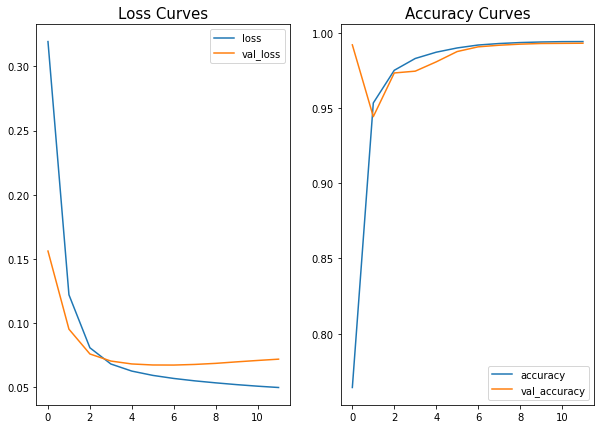

In [ ]:
# Plot the loss and accuracy curves
plot_loss(lstm_history)

In [ ]:
# Make predictions with the base model
preds = lstm_model.predict(val_ds)
preds[:20,:]

array([[0.01124955, 0.00162987, 0.00352016, 0.00315917, 0.00348129,
        0.00339334],
       [0.00996108, 0.00153575, 0.00320503, 0.00325387, 0.00307006,
        0.00330245],
       [0.02177303, 0.00228816, 0.00641888, 0.00263476, 0.00664982,
        0.00353184],
       [0.00956609, 0.00151577, 0.00310604, 0.00329832, 0.00301288,
        0.00338028],
       [0.07955311, 0.00338695, 0.02129295, 0.00344196, 0.01912155,
        0.00380438],
       [0.0117738 , 0.00166695, 0.00364179, 0.00319041, 0.00360068,
        0.00347111],
       [0.00982909, 0.00153832, 0.00317811, 0.00329269, 0.00306311,
        0.00334516],
       [0.01048026, 0.00159191, 0.00330304, 0.00324859, 0.00329332,
        0.00341007],
       [0.03782321, 0.00280975, 0.01093888, 0.00265887, 0.01088436,
        0.00336485],
       [0.01052177, 0.00157871, 0.00332137, 0.00321384, 0.00328844,
        0.00342126],
       [0.01131251, 0.00164604, 0.00352253, 0.00314056, 0.00358719,
        0.00350302],
       [0.03877864, 0

In [ ]:
f_batch = val_ds.take(1)
i = 0
for sentence, label in f_batch.unbatch():
  print(f'Original: {sentence.numpy()}\n')
  print(f'Label: {label.numpy()}\n')
  print(f'Pred: {tf.round(preds[i])}')
  i+=1

Original: b'You think  is a legit edit after having vandalized your userpage and placed  on a talk page? In any case, I did message the user to explain further.'

Label: [0 0 0 0 0 0]

Pred: [0. 0. 0. 0. 0. 0.]
Original: b'"\n\nEminem is Back\nEminem released an album in 2004 entitled, ""Eminem is Back"". Eminem Is Back is an official album but it wasn\'t released by Eminem\'s label so they released it without his permission. (http://www.mp3.com/albums/648659/summary.html), (http://artists.letssingit.com/eminem-album-eminem-is-back-tgbspf). How many other albums are out there than Eminem produced but isn\'t listed in wikipedia? I\'m starting the page, its track list will be there as well.   "'

Label: [0 0 0 0 0 0]

Pred: [0. 0. 0. 0. 0. 0.]
Original: b"Lady Annabel Goldsmith\nI've reverted your deletion of the Private Eye reference, which I don't entirely understand. I assume your reference to BLP was about libel, but I don't see that this could be libel. See the article's talk page f

## Create a model with Conv1D

In [ ]:
# Create a Convolution Model
inputs = Input(shape=(1,), dtype=tf.string, name='input_layer')
vec = vectorizer(inputs)
emb = embedding(vec)
conv = tf.keras.layers.Conv1D(16, 5, activation='relu')(emb)
pool = tf.keras.layers.GlobalMaxPool1D()(conv)
outputs = Dense(6, activation='sigmoid', name='output_layer')(pool)
conv_model = tf.keras.Model(inputs, outputs, name='conv_model')

# Compile the model
conv_model.compile(loss='binary_crossentropy',
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                   metrics=['categorical_accuracy'])

# Display the summary of the model
conv_model.summary()

Model: "conv_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 20)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 20, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 16)            10256     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 16)               0         
 balMaxPooling1D)                                                
                                                                 
 output_layer (Dense)        (None, 6)                 1

In [ ]:
# Fit the model
conv_history = conv_model.fit(train_ds,
                              epochs=10,
                              steps_per_epoch=len(train_ds),
                              validation_data=val_ds,
                              validation_steps=len(val_ds))

Epoch 1/10
499/499 [==============================] - 12s 23ms/step - loss: 0.3315 - categorical_accuracy: 0.0148 - val_loss: 0.1542 - val_categorical_accuracy: 0.0944
Epoch 2/10
499/499 [==============================] - 12s 23ms/step - loss: 0.1126 - categorical_accuracy: 0.4377 - val_loss: 0.0980 - val_categorical_accuracy: 0.7663
Epoch 3/10
499/499 [==============================] - 12s 23ms/step - loss: 0.0793 - categorical_accuracy: 0.7961 - val_loss: 0.0797 - val_categorical_accuracy: 0.8678
Epoch 4/10
499/499 [==============================] - 12s 24ms/step - loss: 0.0662 - categorical_accuracy: 0.8380 - val_loss: 0.0734 - val_categorical_accuracy: 0.8726
Epoch 5/10
499/499 [==============================] - 12s 24ms/step - loss: 0.0606 - categorical_accuracy: 0.8206 - val_loss: 0.0713 - val_categorical_accuracy: 0.8546
Epoch 6/10
499/499 [==============================] - 12s 24ms/step - loss: 0.0575 - categorical_accuracy: 0.7986 - val_loss: 0.0704 - val_categorical_accuracy:

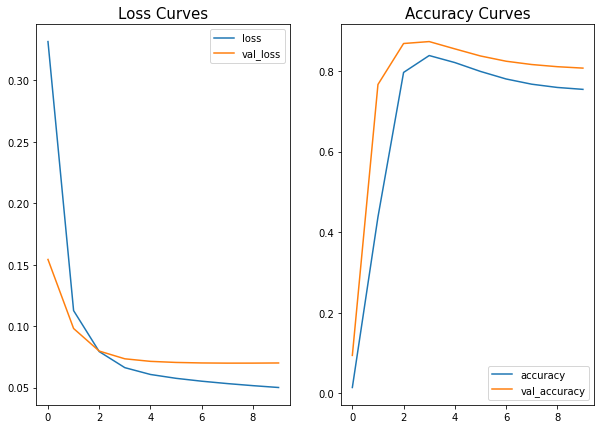

In [ ]:
# Plot the loss and accuracy curves
plot_loss(conv_history)

## Use Transfer Learning

In [ ]:
# Load a pretrained embedding layer (Universal Sentence Encoder) from tensorflow hub
import tensorflow_hub as hub
use = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                     trainable=False,
                     input_shape=[],
                     dtype=tf.string)

In [ ]:
# Create the pretrained embedding model
use_model = tf.keras.models.Sequential([
  use,
  Dense(64, activation='relu'),
  Dense(6, activation='sigmoid')
])

# Compile the model
use_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['categorical_accuracy'])

# Display the summary of the model
use_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 256,831,046
Trainable params: 33,222
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit the model
use_history = use_model.fit(train_ds,
                            epochs=5,
                            validation_data=val_ds)

Epoch 1/5
499/499 [==============================] - 131s 262ms/step - loss: 0.0996 - categorical_accuracy: 0.7607 - val_loss: 0.0674 - val_categorical_accuracy: 0.9109
Epoch 2/5
499/499 [==============================] - 132s 266ms/step - loss: 0.0629 - categorical_accuracy: 0.9245 - val_loss: 0.0618 - val_categorical_accuracy: 0.9265
Epoch 3/5
499/499 [==============================] - 132s 264ms/step - loss: 0.0594 - categorical_accuracy: 0.9340 - val_loss: 0.0599 - val_categorical_accuracy: 0.9330
Epoch 4/5
499/499 [==============================] - 132s 264ms/step - loss: 0.0577 - categorical_accuracy: 0.9400 - val_loss: 0.0589 - val_categorical_accuracy: 0.9337
Epoch 5/5
499/499 [==============================] - 131s 262ms/step - loss: 0.0567 - categorical_accuracy: 0.9402 - val_loss: 0.0583 - val_categorical_accuracy: 0.9301


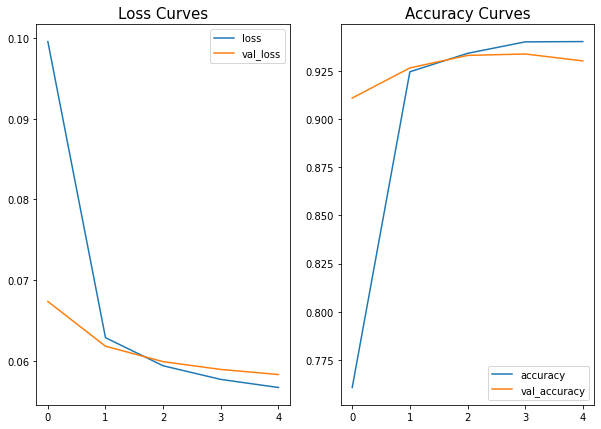

In [ ]:
# Plot the loss curves
plot_loss(use_history)

In [ ]:
# Make prediction with USE model
use_pred = use_model.predict(val_ds)


In [ ]:
# Compare with the true label
i = 0
for sentence, label in f_batch.unbatch():
  print(f"Sentence: {sentence}\n")
  print(f'Label: {label}\n')
  print(f'Pred: {tf.round(use_pred[i])}')
  print('-'*100)
  i+=1

Sentence: b"Geek \n\nWhy don't you fuck off? You and your templates you fucking geek. Go away into your basement and wank your cock off, thats all your good for."

Label: [1 0 1 0 1 0]

Pred: [1. 0. 1. 0. 1. 0.]
----------------------------------------------------------------------------------------------------
Sentence: b'Not Thracian pretty simple 2,000 years away.'

Label: [0 0 0 0 0 0]

Pred: [0. 0. 0. 0. 0. 0.]
----------------------------------------------------------------------------------------------------
Sentence: b"RE, adding to earlier post by (now out of sync by edit-conflict) (: (A) rv because of your invoking WP:V here is not to the point: I just separatd their views. Did not add or change. Even if 'everything is a view', (a) it can be organised and (b) it can be presented encyclopedically. (B) On your invoking WP:OR: by separating and resectioning texts I do not introduce original research. I just read the text, and clearly notice & explain that they are from different

> **CONCLUSION:** Based on the predictions and the accuracy scores, the LSTM Model performed best against Conv1D Model and Universal Sentence Encoder Model.